In [1]:
import os
import glob
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import mr

In [4]:
from mrcnn import model as modellib
from mrcnn import visualize

Using TensorFlow backend.


In [5]:
def get_ax(rows=1, cols=1, size=8):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [6]:
config = mr.TrainConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        30
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [7]:
work_path = os.path.join("E:", os.sep, "RCNNTanks256Train")

os.chdir(work_path)

tif_glob = glob.glob(os.path.join("*", "images", "*.tif"))
n = int(len(tif_glob) * .8)

ds_train = mr.MRDataset()
ds_train.load_glob(tif_glob[:n])
ds_train.prepare()

ds_valid = mr.MRDataset()
ds_valid.load_glob(tif_glob[n:])
ds_valid.prepare()

In [8]:
len(tif_glob)

9030

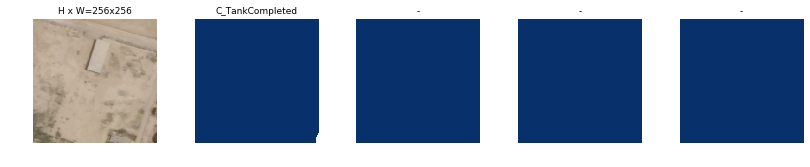

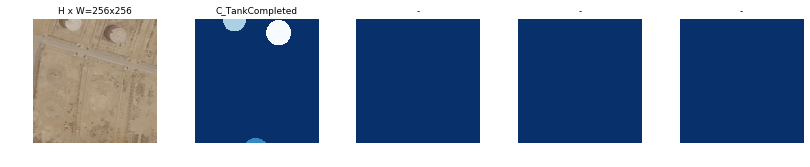

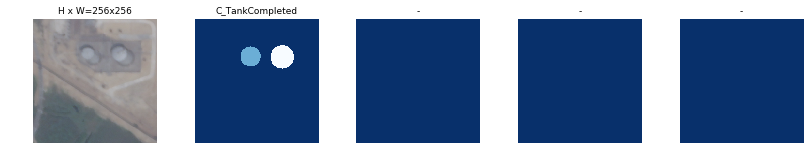

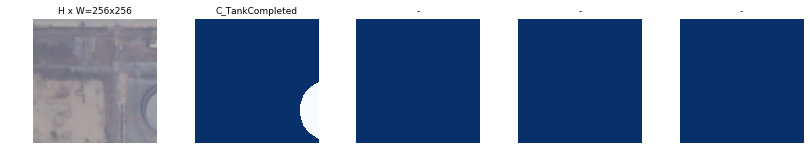

In [9]:
image_ids = np.random.choice(ds_train.image_ids,4)
for image_id in image_ids:
    image = ds_train.load_image(image_id)
    mask, class_ids = ds_train.load_mask(image_id)
    visualize.display_top_masks(image,mask,class_ids,ds_train.class_names)

In [10]:
model = modellib.MaskRCNN(mode="training",
                          config=config,
                          model_dir="logs")

In [11]:
# Which weights to start with?
init_with = "imagenet"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(mr.COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits",
                                "mrcnn_bbox_fc", 
                                "mrcnn_bbox",
                                "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model_path = model.find_last()
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)

In [12]:
model.train(ds_train, ds_valid, 
            learning_rate=config.LEARNING_RATE, 
            epochs=60, 
            layers='heads')


Starting at epoch 0. LR=0.0001

Checkpoint Path: logs\mr20190510T0103\mask_rcnn_mr_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed

C:\Users\raadm0\AppData\Local\ESRI\conda\envs\mask_rcnn\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/60
50/50 [==============================] - 102s 2s/step - loss: 4.1727 - rpn_class_loss: 0.4225 - rpn_bbox_loss: 1.8471 - mrcnn_class_loss: 0.2526 - mrcnn_bbox_loss: 0.9853 - mrcnn_mask_loss: 0.6652 - val_loss: 3.2268 - val_rpn_class_loss: 0.1193 - val_rpn_bbox_loss: 1.5456 - val_mrcnn_class_loss: 0.0704 - val_mrcnn_bbox_loss: 0.8391 - val_mrcnn_mask_loss: 0.6524
Epoch 2/60
50/50 [==============================] - 82s 2s/step - loss: 2.9982 - rpn_class_loss: 0.1115 - rpn_bbox_loss: 1.3856 - mrcnn_class_loss: 0.0745 - mrcnn_bbox_loss: 0.7791 - mrcnn_mask_loss: 0.6475 - val_loss: 2.8725 - val_rpn_class_loss: 0.0920 - val_rpn_bbox_loss: 1.3459 - val_mrcnn_class_loss: 0.0757 - val_mrcnn_bbox_loss: 0.7352 - val_mrcnn_mask_loss: 0.6237
Epoch 3/60
50/50 [==============================] - 83s 2s/step - loss: 2.7290 - rpn_class_loss: 0.1090 - rpn_bbox_loss: 1.2355 - mrcnn_class_loss: 0.0739 - mrcnn_bbox_loss: 0.6879 - mrcnn_mask_loss: 0.6226 - val_loss: 2.8938 - val_rpn_class_loss: 0.0

Epoch 23/60
50/50 [==============================] - 94s 2s/step - loss: 1.9091 - rpn_class_loss: 0.0696 - rpn_bbox_loss: 0.8385 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.3866 - mrcnn_mask_loss: 0.5561 - val_loss: 1.8085 - val_rpn_class_loss: 0.0537 - val_rpn_bbox_loss: 0.7849 - val_mrcnn_class_loss: 0.0434 - val_mrcnn_bbox_loss: 0.3908 - val_mrcnn_mask_loss: 0.5357
Epoch 24/60
50/50 [==============================] - 93s 2s/step - loss: 1.8331 - rpn_class_loss: 0.0640 - rpn_bbox_loss: 0.7907 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.3722 - mrcnn_mask_loss: 0.5520 - val_loss: 1.9666 - val_rpn_class_loss: 0.0593 - val_rpn_bbox_loss: 0.9082 - val_mrcnn_class_loss: 0.0521 - val_mrcnn_bbox_loss: 0.3989 - val_mrcnn_mask_loss: 0.5482
Epoch 25/60
50/50 [==============================] - 94s 2s/step - loss: 1.8651 - rpn_class_loss: 0.0689 - rpn_bbox_loss: 0.8084 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.3706 - mrcnn_mask_loss: 0.5591 - val_loss: 2.0873 - val_rpn_class_loss: 0

Epoch 45/60
50/50 [==============================] - 93s 2s/step - loss: 1.5917 - rpn_class_loss: 0.0523 - rpn_bbox_loss: 0.6694 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.3083 - mrcnn_mask_loss: 0.5095 - val_loss: 1.7995 - val_rpn_class_loss: 0.0443 - val_rpn_bbox_loss: 0.8741 - val_mrcnn_class_loss: 0.0419 - val_mrcnn_bbox_loss: 0.3402 - val_mrcnn_mask_loss: 0.4990
Epoch 46/60
50/50 [==============================] - 93s 2s/step - loss: 1.6176 - rpn_class_loss: 0.0522 - rpn_bbox_loss: 0.6943 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.3093 - mrcnn_mask_loss: 0.5111 - val_loss: 1.7164 - val_rpn_class_loss: 0.0474 - val_rpn_bbox_loss: 0.7752 - val_mrcnn_class_loss: 0.0465 - val_mrcnn_bbox_loss: 0.3520 - val_mrcnn_mask_loss: 0.4952
Epoch 47/60
50/50 [==============================] - 94s 2s/step - loss: 1.5612 - rpn_class_loss: 0.0565 - rpn_bbox_loss: 0.6395 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.3030 - mrcnn_mask_loss: 0.5060 - val_loss: 1.7332 - val_rpn_class_loss: 0

In [13]:
model.train(ds_train, ds_valid, 
            learning_rate=config.LEARNING_RATE,
            epochs=120, 
            layers="4+")


Starting at epoch 60. LR=0.0001

Checkpoint Path: logs\mr20190510T0103\mask_rcnn_mr_{epoch:04d}.h5
Selecting layers to train
res4a_branch2a         (Conv2D)
bn4a_branch2a          (BatchNorm)
res4a_branch2b         (Conv2D)
bn4a_branch2b          (BatchNorm)
res4a_branch2c         (Conv2D)
res4a_branch1          (Conv2D)
bn4a_branch2c          (BatchNorm)
bn4a_branch1           (BatchNorm)
res4b_branch2a         (Conv2D)
bn4b_branch2a          (BatchNorm)
res4b_branch2b         (Conv2D)
bn4b_branch2b          (BatchNorm)
res4b_branch2c         (Conv2D)
bn4b_branch2c          (BatchNorm)
res4c_branch2a         (Conv2D)
bn4c_branch2a          (BatchNorm)
res4c_branch2b         (Conv2D)
bn4c_branch2b          (BatchNorm)
res4c_branch2c         (Conv2D)
bn4c_branch2c          (BatchNorm)
res4d_branch2a         (Conv2D)
bn4d_branch2a          (BatchNorm)
res4d_branch2b         (Conv2D)
bn4d_branch2b          (BatchNorm)
res4d_branch2c         (Conv2D)
bn4d_branch2c          (BatchNorm)
res

C:\Users\raadm0\AppData\Local\ESRI\conda\envs\mask_rcnn\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 61/120
50/50 [==============================] - 132s 3s/step - loss: 1.5047 - rpn_class_loss: 0.0501 - rpn_bbox_loss: 0.6498 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.2787 - mrcnn_mask_loss: 0.4735 - val_loss: 1.6851 - val_rpn_class_loss: 0.0415 - val_rpn_bbox_loss: 0.7718 - val_mrcnn_class_loss: 0.0474 - val_mrcnn_bbox_loss: 0.3509 - val_mrcnn_mask_loss: 0.4735
Epoch 62/120
50/50 [==============================] - 101s 2s/step - loss: 1.4759 - rpn_class_loss: 0.0479 - rpn_bbox_loss: 0.6112 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.2874 - mrcnn_mask_loss: 0.4737 - val_loss: 1.5963 - val_rpn_class_loss: 0.0374 - val_rpn_bbox_loss: 0.7239 - val_mrcnn_class_loss: 0.0431 - val_mrcnn_bbox_loss: 0.3368 - val_mrcnn_mask_loss: 0.4551
Epoch 63/120
50/50 [==============================] - 102s 2s/step - loss: 1.4368 - rpn_class_loss: 0.0500 - rpn_bbox_loss: 0.5827 - mrcnn_class_loss: 0.0593 - mrcnn_bbox_loss: 0.2744 - mrcnn_mask_loss: 0.4704 - val_loss: 1.6741 - val_rpn_class_l

Epoch 83/120
50/50 [==============================] - 101s 2s/step - loss: 1.2141 - rpn_class_loss: 0.0398 - rpn_bbox_loss: 0.4802 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.2313 - mrcnn_mask_loss: 0.4056 - val_loss: 1.3380 - val_rpn_class_loss: 0.0299 - val_rpn_bbox_loss: 0.6127 - val_mrcnn_class_loss: 0.0378 - val_mrcnn_bbox_loss: 0.2721 - val_mrcnn_mask_loss: 0.3855
Epoch 84/120
50/50 [==============================] - 102s 2s/step - loss: 1.2241 - rpn_class_loss: 0.0411 - rpn_bbox_loss: 0.4845 - mrcnn_class_loss: 0.0533 - mrcnn_bbox_loss: 0.2392 - mrcnn_mask_loss: 0.4060 - val_loss: 1.4076 - val_rpn_class_loss: 0.0378 - val_rpn_bbox_loss: 0.6530 - val_mrcnn_class_loss: 0.0517 - val_mrcnn_bbox_loss: 0.2825 - val_mrcnn_mask_loss: 0.3826
Epoch 85/120
50/50 [==============================] - 102s 2s/step - loss: 1.2055 - rpn_class_loss: 0.0407 - rpn_bbox_loss: 0.4774 - mrcnn_class_loss: 0.0532 - mrcnn_bbox_loss: 0.2359 - mrcnn_mask_loss: 0.3985 - val_loss: 1.4361 - val_rpn_class_l

Epoch 105/120
50/50 [==============================] - 102s 2s/step - loss: 1.0995 - rpn_class_loss: 0.0346 - rpn_bbox_loss: 0.4568 - mrcnn_class_loss: 0.0489 - mrcnn_bbox_loss: 0.2132 - mrcnn_mask_loss: 0.3461 - val_loss: 1.3055 - val_rpn_class_loss: 0.0269 - val_rpn_bbox_loss: 0.6649 - val_mrcnn_class_loss: 0.0357 - val_mrcnn_bbox_loss: 0.2625 - val_mrcnn_mask_loss: 0.3155
Epoch 106/120
50/50 [==============================] - 102s 2s/step - loss: 1.1169 - rpn_class_loss: 0.0373 - rpn_bbox_loss: 0.4674 - mrcnn_class_loss: 0.0490 - mrcnn_bbox_loss: 0.2174 - mrcnn_mask_loss: 0.3459 - val_loss: 1.1887 - val_rpn_class_loss: 0.0278 - val_rpn_bbox_loss: 0.5667 - val_mrcnn_class_loss: 0.0392 - val_mrcnn_bbox_loss: 0.2399 - val_mrcnn_mask_loss: 0.3152
Epoch 107/120
50/50 [==============================] - 101s 2s/step - loss: 1.0482 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.4088 - mrcnn_class_loss: 0.0492 - mrcnn_bbox_loss: 0.2099 - mrcnn_mask_loss: 0.3474 - val_loss: 1.1859 - val_rpn_clas

In [ ]:
model.train(ds_train, ds_valid, 
            learning_rate=config.LEARNING_RATE / 10.0,
            epochs=500, 
            layers="all")


Starting at epoch 120. LR=1e-05

Checkpoint Path: logs\mr20190510T0103\mask_rcnn_mr_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b          (BatchNorm)
res

C:\Users\raadm0\AppData\Local\ESRI\conda\envs\mask_rcnn\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 121/500
50/50 [==============================] - 144s 3s/step - loss: 1.0115 - rpn_class_loss: 0.0353 - rpn_bbox_loss: 0.4082 - mrcnn_class_loss: 0.0504 - mrcnn_bbox_loss: 0.1948 - mrcnn_mask_loss: 0.3229 - val_loss: 1.3429 - val_rpn_class_loss: 0.0370 - val_rpn_bbox_loss: 0.7313 - val_mrcnn_class_loss: 0.0377 - val_mrcnn_bbox_loss: 0.2331 - val_mrcnn_mask_loss: 0.3037
Epoch 122/500
50/50 [==============================] - 105s 2s/step - loss: 1.0056 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.4119 - mrcnn_class_loss: 0.0468 - mrcnn_bbox_loss: 0.1937 - mrcnn_mask_loss: 0.3234 - val_loss: 1.1172 - val_rpn_class_loss: 0.0290 - val_rpn_bbox_loss: 0.5047 - val_mrcnn_class_loss: 0.0421 - val_mrcnn_bbox_loss: 0.2355 - val_mrcnn_mask_loss: 0.3059
Epoch 123/500
50/50 [==============================] - 106s 2s/step - loss: 0.9809 - rpn_class_loss: 0.0343 - rpn_bbox_loss: 0.3719 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.1947 - mrcnn_mask_loss: 0.3263 - val_loss: 1.0525 - val_rpn_clas

Epoch 143/500
50/50 [==============================] - 105s 2s/step - loss: 0.9514 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.3667 - mrcnn_class_loss: 0.0487 - mrcnn_bbox_loss: 0.1883 - mrcnn_mask_loss: 0.3174 - val_loss: 1.2068 - val_rpn_class_loss: 0.0343 - val_rpn_bbox_loss: 0.5872 - val_mrcnn_class_loss: 0.0469 - val_mrcnn_bbox_loss: 0.2363 - val_mrcnn_mask_loss: 0.3022
Epoch 144/500
50/50 [==============================] - 104s 2s/step - loss: 0.9803 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.3883 - mrcnn_class_loss: 0.0470 - mrcnn_bbox_loss: 0.1924 - mrcnn_mask_loss: 0.3197 - val_loss: 1.2142 - val_rpn_class_loss: 0.0282 - val_rpn_bbox_loss: 0.6260 - val_mrcnn_class_loss: 0.0359 - val_mrcnn_bbox_loss: 0.2366 - val_mrcnn_mask_loss: 0.2874
Epoch 145/500
50/50 [==============================] - 105s 2s/step - loss: 1.0118 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.4217 - mrcnn_class_loss: 0.0481 - mrcnn_bbox_loss: 0.1927 - mrcnn_mask_loss: 0.3176 - val_loss: 1.0940 - val_rpn_clas

Epoch 165/500
50/50 [==============================] - 106s 2s/step - loss: 0.9810 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.3907 - mrcnn_class_loss: 0.0504 - mrcnn_bbox_loss: 0.1887 - mrcnn_mask_loss: 0.3182 - val_loss: 1.1892 - val_rpn_class_loss: 0.0307 - val_rpn_bbox_loss: 0.5721 - val_mrcnn_class_loss: 0.0505 - val_mrcnn_bbox_loss: 0.2335 - val_mrcnn_mask_loss: 0.3024
Epoch 166/500
50/50 [==============================] - 105s 2s/step - loss: 0.9871 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.3991 - mrcnn_class_loss: 0.0471 - mrcnn_bbox_loss: 0.1926 - mrcnn_mask_loss: 0.3166 - val_loss: 1.0829 - val_rpn_class_loss: 0.0253 - val_rpn_bbox_loss: 0.5069 - val_mrcnn_class_loss: 0.0367 - val_mrcnn_bbox_loss: 0.2225 - val_mrcnn_mask_loss: 0.2914
Epoch 167/500
50/50 [==============================] - 105s 2s/step - loss: 0.9504 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.3736 - mrcnn_class_loss: 0.0440 - mrcnn_bbox_loss: 0.1878 - mrcnn_mask_loss: 0.3148 - val_loss: 1.0216 - val_rpn_clas

Epoch 187/500
50/50 [==============================] - 107s 2s/step - loss: 0.9658 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.3725 - mrcnn_class_loss: 0.0502 - mrcnn_bbox_loss: 0.1946 - mrcnn_mask_loss: 0.3164 - val_loss: 1.1989 - val_rpn_class_loss: 0.0313 - val_rpn_bbox_loss: 0.6032 - val_mrcnn_class_loss: 0.0407 - val_mrcnn_bbox_loss: 0.2287 - val_mrcnn_mask_loss: 0.2950
Epoch 188/500
50/50 [==============================] - 105s 2s/step - loss: 0.9398 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.3658 - mrcnn_class_loss: 0.0486 - mrcnn_bbox_loss: 0.1851 - mrcnn_mask_loss: 0.3100 - val_loss: 1.1408 - val_rpn_class_loss: 0.0321 - val_rpn_bbox_loss: 0.5450 - val_mrcnn_class_loss: 0.0431 - val_mrcnn_bbox_loss: 0.2245 - val_mrcnn_mask_loss: 0.2960
Epoch 189/500
50/50 [==============================] - 105s 2s/step - loss: 0.9380 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.3678 - mrcnn_class_loss: 0.0454 - mrcnn_bbox_loss: 0.1862 - mrcnn_mask_loss: 0.3079 - val_loss: 1.0861 - val_rpn_clas

Epoch 209/500
50/50 [==============================] - 106s 2s/step - loss: 0.9271 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.3561 - mrcnn_class_loss: 0.0480 - mrcnn_bbox_loss: 0.1798 - mrcnn_mask_loss: 0.3138 - val_loss: 1.1885 - val_rpn_class_loss: 0.0286 - val_rpn_bbox_loss: 0.5733 - val_mrcnn_class_loss: 0.0404 - val_mrcnn_bbox_loss: 0.2435 - val_mrcnn_mask_loss: 0.3026
Epoch 210/500
50/50 [==============================] - 105s 2s/step - loss: 0.9215 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.3804 - mrcnn_class_loss: 0.0435 - mrcnn_bbox_loss: 0.1742 - mrcnn_mask_loss: 0.2944 - val_loss: 1.1835 - val_rpn_class_loss: 0.0312 - val_rpn_bbox_loss: 0.5823 - val_mrcnn_class_loss: 0.0433 - val_mrcnn_bbox_loss: 0.2357 - val_mrcnn_mask_loss: 0.2909
Epoch 211/500
50/50 [==============================] - 105s 2s/step - loss: 0.9639 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.3903 - mrcnn_class_loss: 0.0470 - mrcnn_bbox_loss: 0.1893 - mrcnn_mask_loss: 0.3072 - val_loss: 1.0605 - val_rpn_clas

Epoch 231/500
50/50 [==============================] - 105s 2s/step - loss: 0.9178 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.3633 - mrcnn_class_loss: 0.0467 - mrcnn_bbox_loss: 0.1790 - mrcnn_mask_loss: 0.2989 - val_loss: 1.0715 - val_rpn_class_loss: 0.0247 - val_rpn_bbox_loss: 0.4982 - val_mrcnn_class_loss: 0.0408 - val_mrcnn_bbox_loss: 0.2242 - val_mrcnn_mask_loss: 0.2836
Epoch 232/500
50/50 [==============================] - 106s 2s/step - loss: 0.9756 - rpn_class_loss: 0.0335 - rpn_bbox_loss: 0.4123 - mrcnn_class_loss: 0.0478 - mrcnn_bbox_loss: 0.1797 - mrcnn_mask_loss: 0.3023 - val_loss: 1.1015 - val_rpn_class_loss: 0.0260 - val_rpn_bbox_loss: 0.5303 - val_mrcnn_class_loss: 0.0376 - val_mrcnn_bbox_loss: 0.2236 - val_mrcnn_mask_loss: 0.2840
Epoch 233/500
50/50 [==============================] - 105s 2s/step - loss: 0.9344 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.3598 - mrcnn_class_loss: 0.0494 - mrcnn_bbox_loss: 0.1883 - mrcnn_mask_loss: 0.3069 - val_loss: 1.2851 - val_rpn_clas

Epoch 253/500
50/50 [==============================] - 106s 2s/step - loss: 0.9249 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.3492 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.1861 - mrcnn_mask_loss: 0.3061 - val_loss: 1.1429 - val_rpn_class_loss: 0.0278 - val_rpn_bbox_loss: 0.5307 - val_mrcnn_class_loss: 0.0441 - val_mrcnn_bbox_loss: 0.2457 - val_mrcnn_mask_loss: 0.2946
Epoch 254/500
50/50 [==============================] - 105s 2s/step - loss: 0.9391 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.3603 - mrcnn_class_loss: 0.0482 - mrcnn_bbox_loss: 0.1896 - mrcnn_mask_loss: 0.3117 - val_loss: 1.0905 - val_rpn_class_loss: 0.0270 - val_rpn_bbox_loss: 0.5296 - val_mrcnn_class_loss: 0.0406 - val_mrcnn_bbox_loss: 0.2171 - val_mrcnn_mask_loss: 0.2762
Epoch 255/500
50/50 [==============================] - 105s 2s/step - loss: 0.9230 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.3523 - mrcnn_class_loss: 0.0484 - mrcnn_bbox_loss: 0.1858 - mrcnn_mask_loss: 0.3061 - val_loss: 1.0114 - val_rpn_clas

Epoch 275/500
50/50 [==============================] - 105s 2s/step - loss: 0.9719 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.4073 - mrcnn_class_loss: 0.0476 - mrcnn_bbox_loss: 0.1815 - mrcnn_mask_loss: 0.3025 - val_loss: 1.1970 - val_rpn_class_loss: 0.0268 - val_rpn_bbox_loss: 0.6049 - val_mrcnn_class_loss: 0.0340 - val_mrcnn_bbox_loss: 0.2341 - val_mrcnn_mask_loss: 0.2972
Epoch 276/500
50/50 [==============================] - 105s 2s/step - loss: 0.9377 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.3725 - mrcnn_class_loss: 0.0459 - mrcnn_bbox_loss: 0.1913 - mrcnn_mask_loss: 0.2996 - val_loss: 1.0254 - val_rpn_class_loss: 0.0235 - val_rpn_bbox_loss: 0.4622 - val_mrcnn_class_loss: 0.0436 - val_mrcnn_bbox_loss: 0.2301 - val_mrcnn_mask_loss: 0.2659
Epoch 277/500
50/50 [==============================] - 105s 2s/step - loss: 0.8747 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.3370 - mrcnn_class_loss: 0.0442 - mrcnn_bbox_loss: 0.1751 - mrcnn_mask_loss: 0.2914 - val_loss: 1.1978 - val_rpn_clas

Epoch 297/500
50/50 [==============================] - 106s 2s/step - loss: 0.9105 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.3441 - mrcnn_class_loss: 0.0494 - mrcnn_bbox_loss: 0.1840 - mrcnn_mask_loss: 0.3023 - val_loss: 1.0344 - val_rpn_class_loss: 0.0251 - val_rpn_bbox_loss: 0.4312 - val_mrcnn_class_loss: 0.0447 - val_mrcnn_bbox_loss: 0.2436 - val_mrcnn_mask_loss: 0.2899
Epoch 298/500
50/50 [==============================] - 106s 2s/step - loss: 0.9469 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.3852 - mrcnn_class_loss: 0.0479 - mrcnn_bbox_loss: 0.1847 - mrcnn_mask_loss: 0.2982 - val_loss: 1.0446 - val_rpn_class_loss: 0.0271 - val_rpn_bbox_loss: 0.5037 - val_mrcnn_class_loss: 0.0338 - val_mrcnn_bbox_loss: 0.2143 - val_mrcnn_mask_loss: 0.2656
Epoch 299/500
50/50 [==============================] - 106s 2s/step - loss: 0.8896 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.3431 - mrcnn_class_loss: 0.0429 - mrcnn_bbox_loss: 0.1811 - mrcnn_mask_loss: 0.2952 - val_loss: 1.1759 - val_rpn_clas

Epoch 319/500
50/50 [==============================] - 106s 2s/step - loss: 0.8842 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.3375 - mrcnn_class_loss: 0.0498 - mrcnn_bbox_loss: 0.1755 - mrcnn_mask_loss: 0.2923 - val_loss: 1.1060 - val_rpn_class_loss: 0.0252 - val_rpn_bbox_loss: 0.5575 - val_mrcnn_class_loss: 0.0389 - val_mrcnn_bbox_loss: 0.2156 - val_mrcnn_mask_loss: 0.2689
Epoch 320/500
50/50 [==============================] - 105s 2s/step - loss: 0.9169 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.3628 - mrcnn_class_loss: 0.0431 - mrcnn_bbox_loss: 0.1837 - mrcnn_mask_loss: 0.2985 - val_loss: 1.0462 - val_rpn_class_loss: 0.0279 - val_rpn_bbox_loss: 0.5179 - val_mrcnn_class_loss: 0.0327 - val_mrcnn_bbox_loss: 0.1991 - val_mrcnn_mask_loss: 0.2686
Epoch 321/500
50/50 [==============================] - 105s 2s/step - loss: 0.8723 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.3429 - mrcnn_class_loss: 0.0436 - mrcnn_bbox_loss: 0.1730 - mrcnn_mask_loss: 0.2848 - val_loss: 1.0183 - val_rpn_clas

Epoch 341/500
50/50 [==============================] - 106s 2s/step - loss: 0.8807 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.3349 - mrcnn_class_loss: 0.0464 - mrcnn_bbox_loss: 0.1765 - mrcnn_mask_loss: 0.2940 - val_loss: 1.0865 - val_rpn_class_loss: 0.0266 - val_rpn_bbox_loss: 0.4937 - val_mrcnn_class_loss: 0.0398 - val_mrcnn_bbox_loss: 0.2367 - val_mrcnn_mask_loss: 0.2896
Epoch 342/500
50/50 [==============================] - 105s 2s/step - loss: 0.8896 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.3520 - mrcnn_class_loss: 0.0443 - mrcnn_bbox_loss: 0.1751 - mrcnn_mask_loss: 0.2900 - val_loss: 1.0430 - val_rpn_class_loss: 0.0240 - val_rpn_bbox_loss: 0.4811 - val_mrcnn_class_loss: 0.0435 - val_mrcnn_bbox_loss: 0.2206 - val_mrcnn_mask_loss: 0.2738
Epoch 343/500
50/50 [==============================] - 105s 2s/step - loss: 0.8747 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.3282 - mrcnn_class_loss: 0.0472 - mrcnn_bbox_loss: 0.1783 - mrcnn_mask_loss: 0.2935 - val_loss: 1.0066 - val_rpn_clas

In [ ]:
model.keras_model.save("C_TankCompleted.h5")

In [ ]:
inference_config = mr.InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference",
                          config=inference_config,
                          model_dir="logs")

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

In [ ]:
dataset = ds_valid
image_id = random.choice(dataset.image_ids)

original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, inference_config, 
                           image_id, use_mini_mask=False)

results = model.detect([original_image], verbose=0)
r = results[0]

ax1, ax2 = get_ax(1,2)
visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset.class_names, ax=ax1)
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax2)